<a href="https://colab.research.google.com/github/charleseleri/stock-data-visualizer/blob/main/API_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter stock symbol: AAPL


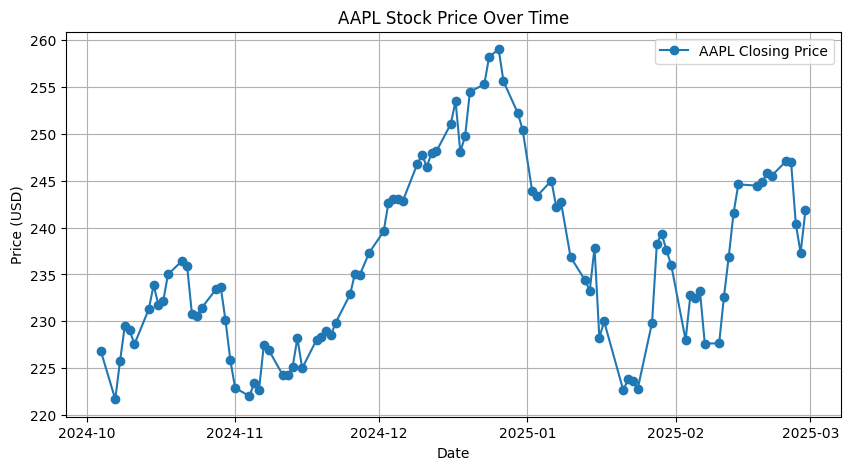

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch stock data from Alpha Vantage API
def fetch_stock_data(symbol):
    API_KEY = "21YYWNHZ2DFIUIPX"  # Using provided API key
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}&outputsize=compact"
    response = requests.get(url)

    try:
        data = response.json()

        # Check if API response contains an error message
        if "Note" in data:
            print("API Rate Limit Reached. Please wait or use a different key.")
            return None
        if "Error Message" in data:
            print("Invalid API Key or Stock Symbol. Please check and try again.")
            return None
        if "Time Series (Daily)" not in data:
            print(f"Unexpected response: {data}")
            return None

        # Process valid response
        time_series = data["Time Series (Daily)"]
        df = pd.DataFrame.from_dict(time_series, orient='index', dtype=float)
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df.rename(columns={"1. open": "Open", "2. high": "High", "3. low": "Low", "4. close": "Close", "5. volume": "Volume"}, inplace=True)
        return df

    except Exception as e:
        print(f"Exception encountered: {e}")
        return None

# Function to plot stock data
def plot_stock_data(df, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], marker='o', linestyle='-', label=f'{symbol} Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'{symbol} Stock Price Over Time')
    plt.legend()
    plt.grid()
    plt.show()

# Command-line version (without Tkinter)
if __name__ == "__main__":
    symbol = input("Enter stock symbol: ").upper()
    df = fetch_stock_data(symbol)

    if df is not None and not df.empty:
        plot_stock_data(df, symbol)
    else:
        print("Error fetching data. Try again.")
